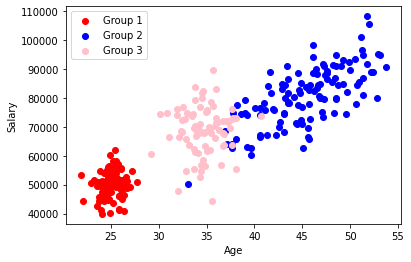

In [115]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

# Create covariance matrix from std devs + correlation
def covariance_matrix(std_dev_1,std_dev_2,correlation):
    return [[std_dev_1 ** 2, correlation * std_dev_1 * std_dev_2], 
           [correlation * std_dev_1 * std_dev_2, std_dev_2 ** 2]]

# Return a bivariate sample given means/std dev/correlation
def age_salary_sample(distribution_params,sample_size):
    mean = [distribution_params["age_mean"], distribution_params["salary_mean"]]
    cov = covariance_matrix(distribution_params["age_std_dev"],distribution_params["salary_std_dev"],
                            distribution_params["age_salary_correlation"])
    return np.random.multivariate_normal(mean, cov, sample_size).T

# Define the characteristics of our age/salary distribution
age_salary_distribution_1 = {"age_mean":25,"salary_mean":50000,
                             "age_std_dev":1,"salary_std_dev":5000,"age_salary_correlation":0.3}

age_salary_distribution_2 = {"age_mean":45,"salary_mean":80000,
                             "age_std_dev":4,"salary_std_dev":10000,"age_salary_correlation":0.7}

age_salary_distribution_3 = {"age_mean":35,"salary_mean":70000,
                             "age_std_dev":2,"salary_std_dev":9000,"age_salary_correlation":0.1}

distribution_data = [age_salary_distribution_1,age_salary_distribution_2,age_salary_distribution_3]

# Sample age/salary data for each distributions
group_1_ages,group_1_salaries = age_salary_sample(age_salary_distribution_1,sample_size=100)
group_2_ages,group_2_salaries = age_salary_sample(age_salary_distribution_2,sample_size=120)
group_3_ages,group_3_salaries = age_salary_sample(age_salary_distribution_3,sample_size=80)

# Plot the sample data
group_1_colour, group_2_colour, group_3_colour ='red','blue', 'pink'
plt.xlabel('Age',fontsize=10)
plt.ylabel("Salary",fontsize=10) 

plt.scatter(group_1_ages,group_1_salaries,c=group_1_colour,label="Group 1")
plt.scatter(group_2_ages,group_2_salaries,c=group_2_colour,label="Group 2")
plt.scatter(group_3_ages,group_3_salaries,c=group_3_colour,label="Group 3")

plt.legend(loc='upper left')
plt.show()

In [116]:
from sklearn.mixture import GaussianMixture

ages=np.concatenate([group_1_ages,group_2_ages,group_3_ages])
salaries=np.concatenate([group_1_salaries,group_2_salaries,group_3_salaries])
age_salary_matrix=np.matrix([ages,salaries]).T

# Find the optimal number of clusters
optimal_cluster_count = 1
best_bic_score = GaussianMixture(1).fit(age_salary_matrix).bic(age_salary_matrix)

for count in range(1,20):
    gm=GaussianMixture(count)
    gm.fit(age_salary_matrix)
    if gm.bic(age_salary_matrix) < best_bic_score:
        best_bic_score = gm.bic(age_salary_matrix)
        optimal_cluster_count = count

print("Optimal cluster count found to be "+str(optimal_cluster_count))

Optimal cluster count found to be 3


In [126]:
# Generate the model using the optimal no of clusters
# Look at the estimates for the distribution parameters for each cluster in the group
print("Distribution parameter estimates")

gm = GaussianMixture(optimal_cluster_count)
gm.fit(age_salary_matrix)

estimates = []
# Index
for index in range(0,optimal_cluster_count):
    estimated_mean_age = round(gm.means_[index][0],2)
    estimated_mean_salary = round(gm.means_[index][1],0)
    estimated_age_std_dev = round(math.sqrt(gm.covariances_[index][0][0]),2)
    estimated_salary_std_dev = round(math.sqrt(gm.covariances_[index][1][1]),0)
    estimated_correlation = round(gm.covariances_[index][0][1] / ( estimated_age_std_dev * estimated_salary_std_dev ),3)
    row = [estimated_mean_age,estimated_mean_salary,estimated_age_std_dev,estimated_salary_std_dev,estimated_correlation]
    estimates.append(row)
    
pd.DataFrame(estimates,columns = ["Mean Age","Mean Salary","Age Std Dev","Salary Std Dev","Correlation"])    


Distribution parameter estimates


,Mean Age,Mean Salary,Age Std Dev,Salary Std Dev,Correlation
0,25.07,50078.0,1.02,4415.0,0.161
1,46.12,82143.0,3.69,9193.0,0.628
2,35.15,68644.0,2.29,8233.0,0.083


In [128]:
# Look at actual parameter values
print("Actual parameter values")
distribution_data_as_rows = []
for distribution in distribution_data:
    row = [distribution['age_mean'],distribution['salary_mean'],distribution['age_std_dev'],
                             distribution['salary_std_dev'],distribution['age_salary_correlation']]
    distribution_data_as_rows.append(row)

pd.DataFrame(distribution_data_as_rows,columns = ["Mean Age","Mean Salary","Age Std Dev","Salary Std Dev","Correlation"])    

Actual parameter values


,Mean Age,Mean Salary,Age Std Dev,Salary Std Dev,Correlation
0,25,50000,1,5000,0.3
1,45,80000,4,10000,0.7
2,35,70000,2,9000,0.1


In [1]:
len([1,2,3])

3

In [3]:
Double(3)

NameError: name 'Double' is not defined

In [4]:
float(3)

3.0